In [1]:
import numpy as np
import matplotlib.pyplot as plt

from generate_colormap import *

from scipy.io import readsav

import jdcal as jd 
from datetime import date

import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import linregress

In [2]:
#Path for simulation results
path = '/home/sophie-stucki/sunsim/'
#Path of the classification maps
path_maps = '/home/sophie-stucki/sunsim/'
#Folder name
folder = 'maps_active_2015_07_11'

#Timeline of the simulations
start_time = jd.gcal2jd(2015,7,18)[1] + 2400000.5
end_time = jd.gcal2jd(2015,11,18)[1] + 2400000.5

#Load simulation data
simu_mps = np.loadtxt(path + '{}/flux_test_mps.txt'.format(folder))
simu_phoenix = np.loadtxt(path + '{}/flux_test_phoenix.txt'.format(folder))

days_simu = np.loadtxt(path_maps + '{}/days_list.txt'.format(folder))

#Add STAGGER
stagger = False

if stagger:
    simu_stagger = np.loadtxt(path + '{}/flux_test_stagger.txt'.format(folder))

#Use SORCE/TIM data
sorce = True

if sorce:
    sorce_data = readsav('/home/sophie-stucki/Documents/starsim_simulations/nina_spec/DataSSI-SORCE.sav')

#Use TSIS data
tsis_path =  None #'/home/sophie-stucki/starsim/starsim/SDO_input/tsis_tsi_24hr_2021.csv'

if tsis_path != None:
    data_tsis = pd.read_csv(tsis_path)

#Plot the residues
residues = False

In [3]:
#Collect the SORCE data
if sorce:
    t_tsi = []
    data_tsi = []

    for i in range(len(sorce_data['time'])):
        if sorce_data['time'][i] >= start_time and sorce_data['time'][i] <= end_time:
            t_tsi.append(sorce_data['time'][i])

            data_tsi.append(sorce_data['tsi'][i])


    data_tsi = np.squeeze(data_tsi)
    data_tsi *= 100**2 * 10000000

    # Date de départ
    # start_date = date(t_tsi[0][0], t_tsi[0][1], t_tsi[0][2])

    # Calcul du nombre de jours pour chaque date
    days_tsi = [t-start_time for t in t_tsi]

#Mask the zero-values in TSIS data
if tsis_path != None:
    days_tsis = data_tsis['time (Julian Date)'] - start_time 

    mask_tsis = data_tsis['tsi_1au (W/m^2)']>0
    data_tsis = data_tsis['tsi_1au (W/m^2)'][mask_tsis]
    days_tsis = days_tsis[mask_tsis]

#Residues
if sorce:
    days_res_tsi = []
    res_tsi_mps = []
    res_tsi_phoenix = []
    rel_res_tsi_mps = []
    rel_res_tsi_phoenix = []

    if stagger:
        res_tsi_stagger = []
        rel_res_tsi_stagger = []


    for i, d in enumerate(days_simu):
        for j, k in enumerate(days_tsi):
            if d == k - 0.5:
                days_res_tsi.append(d)
                res_tsi_mps.append(1e6 * (data_tsi[j] / np.mean(data_tsi) - simu_mps[i] / np.mean(simu_mps)))
                rel_res_tsi_mps.append(100 * (data_tsi[j] / np.mean(data_tsi) - simu_mps[i] / np.mean(simu_mps)) / (data_tsi[j] / np.mean(data_tsi)))

                res_tsi_phoenix.append(1e6 * (data_tsi[j] / np.mean(data_tsi) - simu_phoenix[i] / np.mean(simu_phoenix)))
                rel_res_tsi_phoenix.append(100 * (data_tsi[j] / np.mean(data_tsi) - simu_phoenix[i] / np.mean(simu_phoenix)) / (data_tsi[j] / np.mean(data_tsi)))

                if stagger:
                    res_tsi_stagger.append(1e6 * (data_tsi[j] / np.mean(data_tsi) - simu_stagger[i] / np.mean(simu_stagger)))
                    rel_res_tsi_stagger.append(100 * (data_tsi[j] / np.mean(data_tsi) - simu_stagger[i] / np.mean(simu_stagger)) / (data_tsi[j] / np.mean(data_tsi)))

if tsis_path != None:
    days_res_tsis = []
    res_tsis_mps = []
    res_tsis_phoenix = []
    rel_res_tsis_mps = []
    rel_res_tsis_phoenix = []

    if stagger:
        res_tsis_stagger = []
        rel_res_tsis_stagger = []


    for i, d in enumerate(days_simu):
        for j, k in enumerate(days_tsis):
            if d == k:
                days_res_tsis.append(d)
                res_tsis_mps.append(1e6 * (data_tsis[j] / np.mean(data_tsis) - simu_mps[i] / np.mean(simu_mps)))
                rel_res_tsis_mps.append(100 * (data_tsis[j] / np.mean(data_tsis) - simu_mps[i] / np.mean(simu_mps)) / (data_tsis[j] / np.mean(data_tsis)))

                res_tsis_phoenix.append(1e6 * (data_tsis[j] / np.mean(data_tsis) - simu_phoenix[i] / np.mean(simu_phoenix)))
                rel_res_tsis_phoenix.append(100 * (data_tsis[j] / np.mean(data_tsis) - simu_phoenix[i] / np.mean(simu_phoenix)) / (data_tsis[j] / np.mean(data_tsis)))

                if stagger:
                    res_tsis_stagger.append(1e6 * (data_tsis[j] / np.mean(data_tsis) - simu_stagger[i] / np.mean(simu_stagger)))
                    rel_res_tsis_stagger.append(100 * (data_tsis[j] / np.mean(data_tsis) - simu_stagger[i] / np.mean(simu_stagger)) / (data_tsis[j] / np.mean(data_tsis)))



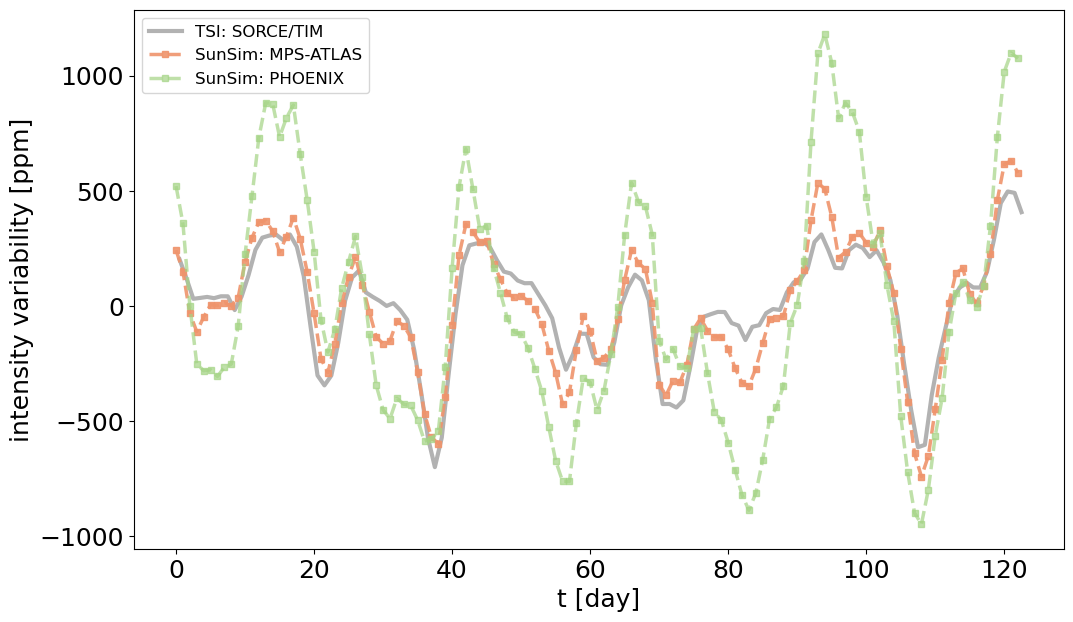

In [4]:
###Ploting the photometetric benchmark

#Comparison
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (12,7)

if tsis_path != None:
    if sorce:
        plt.plot(days_tsis, 1e6 * data_tsis/ np.mean(data_tsis) -1e6, '-', label='TSIS', color="#76C0FD", alpha =0.3, linewidth=3)
    else:
        plt.plot(days_tsis, 1e6 * data_tsis/ np.mean(data_tsis) -1e6, '-', label='TSIS', color="#000000", alpha =0.3, linewidth=3)

    plt.xlim(-1, days_simu[-1]+1)
if sorce:
    plt.plot(days_tsi, 1e6 * data_tsi / np.mean(data_tsi) - 1e6 , '-', label='TSI: SORCE/TIM', color="#000000", alpha =0.3, linewidth=3)
plt.plot(days_simu, 1e6 * simu_mps / np.mean(simu_mps) - 1e6,'s--', markersize=5, linewidth=2.5, label = 'SunSim: MPS-ATLAS', color='#ef946c', alpha=0.9)
if stagger:
    plt.plot(days_simu, 1e6 * simu_stagger / np.mean(simu_stagger) - 1e6,'s--', markersize=5, linewidth=2.5, label = 'SunSim: STAGGER', color="#ce9ffa", alpha=0.7)
plt.plot(days_simu, 1e6 * simu_phoenix / np.mean(simu_phoenix) - 1e6,'s--', markersize=5, linewidth=2.5, label = 'SunSim: PHOENIX', color="#a4d485", alpha=0.7)

plt.legend(fontsize=12)
plt.xlabel('t [day]')

plt.ylabel('intensity variability [ppm]')
plt.savefig(path + '{}/photometric_comparison.png'.format(folder),  dpi=300, bbox_inches='tight')

plt.show()

#Residues
if residues:
    if sorce:
        plt.axhline(0, linestyle= '-', color="#000000", alpha =0.3, linewidth=2 )
        plt.plot(days_res_tsi, res_tsi_mps ,'s--', markersize=5, linewidth=2.5, label = 'SunSim: MPS-ATLAS', color='#ef946c', alpha=0.7)
        plt.plot(days_res_tsi, res_tsi_phoenix,'s--', markersize=5, linewidth=2.5, label = 'SunSim: PHOENIX', color="#a4d485", alpha=0.7)
        if stagger:
            plt.plot(days_res_tsi, res_tsi_stagger,'s--', markersize=5, linewidth=2, label = 'SunSim: STAGGER', color="#ce9ffa", alpha=0.7)

        plt.title('SORCE/TIM')
        plt.legend(fontsize=12)
        plt.xlabel('t [day]')
        plt.ylabel('Residues [ppm]')
        plt.savefig(path + '{}/photometric_residues_SORCE.png'.format(folder),  dpi=300, bbox_inches='tight')

        plt.show()

    if tsis_path != None:
        plt.axhline(0, linestyle= '-', color="#000000", alpha =0.3, linewidth=2 )
        plt.plot(days_res_tsis, res_tsis_mps ,'s--', markersize=5, linewidth=2, label = 'SunSim: MPS-ATLAS', color='#ef946c', alpha=0.7)
        plt.plot(days_res_tsis, res_tsis_phoenix,'s--', markersize=5, linewidth=2, label = 'SunSim: PHOENIX', color="#a4d485", alpha=0.7)
        if stagger:
            plt.plot(days_res_tsis, res_tsis_stagger,'s--', markersize=5, linewidth=2, label = 'SunSim: STAGGER', color="#ce9ffa", alpha=0.7)

        plt.title('TSIS/TIM')
        plt.legend(fontsize=12)
        plt.xlabel('t [day]')
        plt.ylabel('Residues [ppm]')
        plt.savefig(path + '{}/photometric_residues_TSIS.png'.format(folder),  dpi=300, bbox_inches='tight')

        plt.show()

    #Relative residues
    if sorce:
        plt.axhline(0, linestyle= '-', color="#000000", alpha =0.3, linewidth=2 )
        plt.plot(days_res_tsi, rel_res_tsi_mps,'s--', markersize=5, linewidth=2, label = 'SunSim: MPS-ATLAS', color='#ef946c', alpha=0.7)
        plt.plot(days_res_tsi, rel_res_tsi_phoenix,'s--', markersize=5, linewidth=2, label = 'SunSim: PHOENIX', color="#a4d485", alpha=0.7)
        if stagger:
            plt.plot(days_res_tsi, rel_res_tsi_stagger,'s--', markersize=5, linewidth=2, label = 'SunSim: STAGGER', color="#ce9ffa", alpha=0.7)

        plt.title('SORCE/TIM')
        plt.legend(fontsize=12)
        plt.xlabel('t [day]')
        plt.ylabel('Relative residues [%]')
        plt.savefig(path + '{}/photometric_rel_residues_SORCE.png'.format(folder),  dpi=300, bbox_inches='tight')

        plt.show()

    if tsis_path != None:
        plt.axhline(0, linestyle= '-', color="#000000", alpha =0.3, linewidth=2 )
        plt.plot(days_res_tsis, rel_res_tsis_mps,'s--', markersize=5, linewidth=2, label = 'SunSim: MPS-ATLAS', color='#ef946c', alpha=0.7)
        plt.plot(days_res_tsis, rel_res_tsis_phoenix,'s--', markersize=5, linewidth=2, label = 'SunSim: PHOENIX', color="#a4d485", alpha=0.7)
        if stagger:
            plt.plot(days_res_tsis, rel_res_tsis_stagger,'s--', markersize=5, linewidth=2, label = 'SunSim: STAGGER', color="#ce9ffa", alpha=0.7)

        plt.title('TSIS/TIM')
        plt.legend(fontsize=12)
        plt.xlabel('t [day]')
        plt.ylabel('Relative residues [%]')
        plt.savefig(path + '{}/photometric_rel_residues_TSIS.png'.format(folder),  dpi=300, bbox_inches='tight')

        plt.show()

r-values:
MPS-ATLAS    0.94
PHOENIX        0.75


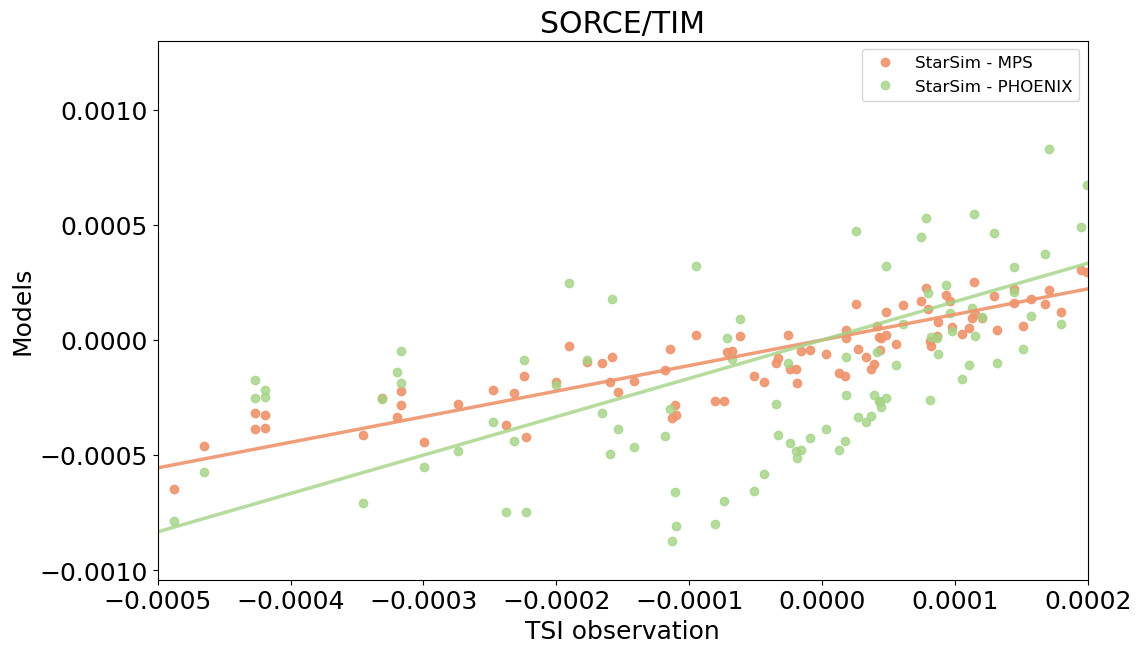

In [5]:
if sorce:
    interp_func = interp1d(days_tsi, data_tsi, kind='linear', bounds_error=False, fill_value='extrapolate')
    days_simu_d = days_simu[1:-1]

    tsi_model_interp = interp_func(days_simu_d)


    detrended_tsi = (tsi_model_interp - np.mean(tsi_model_interp)) / np.mean(tsi_model_interp)
    detrended_mps = (simu_mps[1:-1] - np.mean(simu_mps[1:-1])) / np.mean(simu_mps[1:-1])
    detrended_pho = (simu_phoenix[1:-1] - np.mean(simu_phoenix[1:-1])) / np.mean(simu_phoenix[1:-1])
    if stagger:
        detrended_stag = (simu_stagger[1:-1] - np.mean(simu_stagger[1:-1])) / np.mean(simu_stagger[1:-1])

    x = np.linspace(-0.0005, 0.0002)

    slope_mps, intercept_mps, r_value_mps, p_value_mps, std_err_mps = linregress(detrended_tsi, detrended_mps)
    slope_pho, intercept_pho, r_value_pho, p_value_pho, std_err_pho = linregress(detrended_tsi, detrended_pho)
    if stagger:
        slope_stag, intercept_stag, r_value_stag, p_value_stag, std_err_stag = linregress(detrended_tsi, detrended_stag)



    plt.plot(detrended_tsi, detrended_mps ,'o', label = 'StarSim - MPS', color='#ef946c', alpha=0.9)
    plt.plot(detrended_tsi, detrended_pho ,'o', label = 'StarSim - PHOENIX', color="#a4d485", alpha=0.8)
    if stagger:
        plt.plot(detrended_tsi, detrended_stag ,'o', label = 'StarSim - STAGGER', color="#ce9ffa", alpha=0.7)

    plt.plot(x, slope_mps * x + intercept_mps, color='#ef946c', alpha=0.9, linewidth=2.5)
    plt.plot(x, slope_pho * x + intercept_pho, color='#a4d485', alpha=0.8, linewidth=2.5)
    if stagger:
        plt.plot(x, slope_stag * x + intercept_stag, color="#ce9ffa", alpha=0.7, linewidth=2.5)

    plt.title('SORCE/TIM')
    plt.xlim(-0.0005, 0.0002)
    plt.legend(fontsize=12)
    plt.xlabel('TSI observation')
    plt.ylabel('Models')
    if stagger:
        print('r-values:\nMPS-ATLAS    {:.2f}\nPHOENIX        {:.2f}\nSTAGGER       {:.2f}'.format(r_value_mps, r_value_pho, r_value_stag))
    else:
        print('r-values:\nMPS-ATLAS    {:.2f}\nPHOENIX        {:.2f}'.format(r_value_mps, r_value_pho))

    plt.savefig(path + '{}reg_lin_SORCE.png'.format(folder),  dpi=300, bbox_inches='tight')
    plt.show()